<a href="https://colab.research.google.com/github/Febriantip/TUGAS-AKHIR/blob/main/Labelling%2BPra_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABELLING K-**MEANS**

In [1]:
import numpy as np
import pandas as pd

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
from nltk.tokenize import word_tokenize
import nltk

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
import pandas as pd
df = pd.read_csv('/content/data_pilkada_TA.csv')

In [3]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [4]:
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stopword remover dan stemmer
# factory_stopwords = StopWordRemoverFactory()
# stopwords = set(factory_stopwords.get_stop_words())

# factory_stemmer = StemmerFactory()
# stemmer = factory_stemmer.create_stemmer()

def clean_text(text):
    if not isinstance(text, str):  # Pastikan nilai berupa string
        return ""

    # Hilangkan karakter non-alfabet, angka, dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Ubah menjadi huruf kecil
    text = text.lower()

    # Tokenisasi kata
    tokens = word_tokenize(text)

    # Hilangkan stopwords
    # tokens = [word for word in tokens if word not in stopwords]

    # Stemming (mengubah kata ke bentuk dasarnya)
    # tokens = [stemmer.stem(word) for word in tokens]

    # Gabungkan kembali menjadi teks bersih
    return ' '.join(tokens)

In [5]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
# Bersihkan kolom title dan description
df['full_text'] = df['full_text'].apply(clean_text)
df['location'] = df['location'].apply(clean_text)
df['username'] = df['username'].apply(clean_text)

In [7]:
df

,full_text,location,username
0,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik
1,pilkada telah sukses kita laksanakan sudah saa...,,postureojinetes
2,pilkada kita telah selesai bagi yang menang ja...,,postureojinetes
3,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik
4,pilkada telah selesai meskipun sebelumnya mung...,,postureojinetes
...,...,...,...
12524,perlunya perubahan yang signifikan menjadi per...,in,httpsxcomnoanggarwatistatus
12525,danrem wkr brigjen tni krido pramono sh httpst...,in,httpsxcomkodamjayakartastatus
12526,micheladam dulu tahun an banten usir penjajah ...,in,httpsxcomgunardistatus
12527,didienazhar klo emang benar itu semua tak ada ...,in,httpsxcomkusdharyanstatus


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
labelin = df['full_text']

In [10]:
# Menggunakan TfidfVectorizer untuk transformasi TF-IDF
vectorizer = TfidfVectorizer()  # max_features untuk memilih jumlah kata terbanyak yang akan diambil
X_tfidf = vectorizer.fit_transform(labelin)

In [11]:
# Menampilkan hasil TF-IDF dalam bentuk DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # init='k-means++' sudah default
kmeans.fit(X_tfidf)

KMeans(n_clusters=3, random_state=42)

In [14]:
# Menampilkan distribusi jumlah data per cluster
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print("Jumlah data per cluster: ")
print(cluster_counts)

Jumlah data per cluster: 
0    9801
2    1370
1    1358
Name: count, dtype: int64


In [15]:
# Mendapatkan fitur kata dari TF-IDF
terms = vectorizer.get_feature_names_out()

# Fungsi untuk menampilkan kata-kata utama per cluster
def get_top_words(cluster_centers, terms, n_top_words=50):
    for cluster_num, center in enumerate(cluster_centers):
        print(f"\nCluster {cluster_num}:")
        # Mengambil indeks kata-kata dengan nilai TF-IDF tertinggi
        top_terms_idx = center.argsort()[-n_top_words:][::-1]
        for idx in top_terms_idx:
            print(f"  {terms[idx]}")

# Menampilkan kata-kata utama dari setiap cluster
get_top_words(kmeans.cluster_centers_, terms)


Cluster 0:
  di
  banten
  dan
  pilkada
  yang
  kinerja
  tangerang
  ini
  yg
  isu
  ada
  survei
  untuk
  dari
  politik
  paslon
  itu
  bisa
  dalam
  ke
  dengan
  ya
  aja
  masyarakat
  jadi
  rakyat
  buat
  ga
  juga
  mau
  tidak
  tahun
  kota
  pada
  nya
  gak
  prabowo
  sama
  tapi
  lagi
  aku
  lebih
  indonesia
  akan
  harus
  korupsi
  kejati
  semua
  dia
  warga

Cluster 1:
  pilgub
  banten
  airin
  golkar
  di
  rachmi
  pdip
  sumardi
  andra
  diany
  ade
  maju
  dan
  soni
  partai
  usung
  untuk
  gubernur
  resmi
  dukung
  airinade
  bahlil
  diusung
  dukungan
  calon
  pasangan
  sonidimyati
  news
  dengan
  dimyati
  natakusumah
  kader
  pilkada
  yang
  dari
  bakal
  pak
  wakil
  tak
  ini
  rekomendasi
  andradimyati
  pilgubbanten
  deklarasi
  partaigolkar
  dianyade
  ketua
  golkarpedia
  megawati
  kim

Cluster 2:
  pilkada
  damai
  awashoax
  aman
  dan
  mari
  berjalan
  kita
  lancar
  reefreese
  demokrasi
  ratumedia
  dengan
 

In [16]:
# Menambahkan kolom hasil klastering
df['sentimen'] = kmeans.labels_

In [17]:
df

,full_text,location,username,sentimen
0,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik,2
1,pilkada telah sukses kita laksanakan sudah saa...,,postureojinetes,0
2,pilkada kita telah selesai bagi yang menang ja...,,postureojinetes,0
3,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik,2
4,pilkada telah selesai meskipun sebelumnya mung...,,postureojinetes,2
...,...,...,...,...
12524,perlunya perubahan yang signifikan menjadi per...,in,httpsxcomnoanggarwatistatus,0
12525,danrem wkr brigjen tni krido pramono sh httpst...,in,httpsxcomkodamjayakartastatus,0
12526,micheladam dulu tahun an banten usir penjajah ...,in,httpsxcomgunardistatus,0
12527,didienazhar klo emang benar itu semua tak ada ...,in,httpsxcomkusdharyanstatus,0


In [18]:
# Menyimpan DataFrame ke file CSV
df.to_csv('pilkada_labeled.csv', index=False)  # `index=False` untuk tidak menyimpan indeks

PRE-PROCESSING

In [19]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [20]:
# Normalisasi
norm = {" yg ": " yang ", " airin ":" ", " andra ": " ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' airin ade ':' andra dimiyati ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,location,username,sentimen
0,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik,2
1,pilkada telah sukses kita laksanakan sudah saa...,,postureojinetes,0
2,pilkada kita telah selesai bagi yang menang ja...,,postureojinetes,0
3,pilkada berjalan damai lancar dan aman pilkada...,bangka bangka belitung,pecintaik,2
4,pilkada telah selesai meskipun sebelumnya mung...,,postureojinetes,2
...,...,...,...,...
12524,perlunya perubahan yang signifikan menjadi per...,in,httpsxcomnoanggarwatistatus,0
12525,danrem wkr brigjen tni krido pramono sh httpst...,in,httpsxcomkodamjayakartastatus,0
12526,micheladam dulu tahun an banten usir penjajah ...,in,httpsxcomgunardistatus,0
12527,didienazhar klo emang benar itu semua tak ada ...,in,httpsxcomkusdharyanstatus,0


In [21]:
# Stopwords
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary

# Stopwords
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

# Create an instance of ArrayDictionary
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,location,username,sentimen
0,pilkada berjalan damai lancar aman pilkada awa...,bangka bangka belitung,pecintaik,2
1,pilkada sukses laksanakan saatnya kembali bers...,,postureojinetes,0
2,pilkada telah selesai menang jangan pesta berl...,,postureojinetes,0
3,pilkada berjalan damai lancar aman pilkada awa...,bangka bangka belitung,pecintaik,2
4,pilkada selesai meskipun sebelumnya mungkin be...,,postureojinetes,2
...,...,...,...,...
12524,perlunya perubahan signifikan menjadi pertimba...,in,httpsxcomnoanggarwatistatus,0
12525,danrem wkr brigjen tni krido pramono sh httpst...,in,httpsxcomkodamjayakartastatus,0
12526,micheladam dulu tahun an banten usir penjajah ...,in,httpsxcomgunardistatus,0
12527,didienazhar klo emang benar semua tak alasan r...,in,httpsxcomkusdharyanstatus,0


In [22]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[pilkada, berjalan, damai, lancar, aman, pilka..."
1,"[pilkada, sukses, laksanakan, saatnya, kembali..."
2,"[pilkada, telah, selesai, menang, jangan, pest..."
3,"[pilkada, berjalan, damai, lancar, aman, pilka..."
4,"[pilkada, selesai, meskipun, sebelumnya, mungk..."
...,...
12524,"[perlunya, perubahan, signifikan, menjadi, per..."
12525,"[danrem, wkr, brigjen, tni, krido, pramono, sh..."
12526,"[micheladam, dulu, tahun, an, banten, usir, pe..."
12527,"[didienazhar, klo, emang, benar, semua, tak, a..."


In [23]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

Output streaming akan dipotong hingga 5000 baris terakhir.
sch haloo tolong bantu aku isi survei yaa ku dm betul aku tugas survei target minimal org skrg dan target anak smatrimakasihh
bagaimana peta elektoral kini bakal calon presiden enam bulan jelang daftar pasang calon batal status indonesia tuan rumah piala dunia u dampak peta elektoral bakal calon presiden please join us rilis survei
apa sih kira kira alas lembaga survei lain kok ikut keluar sepi mulyono moscow assad trk cambodia senin lewis curcurella httpstcozdpxdrjvpx
seluruh jajar rumah tahan negara kelas i tangerang ucap terimakasih atas partisipasi dukung isi survei indeks persepsi korupsi ipk indeks puas masyarakat ikm periode november httpstcoacwzdl
survei poltracking sesuai sop poltracking selalu depan objektivitas data mulyono moscow assad trk cambodia senin lewis curcurella httpstcoinydjfjw
kira kira ada tiga lembaga survei keluar sepi apa lembaga survey memang lg masalah mulyono moscow assad trk cambodia senin lewis c

In [24]:
df.to_csv('data_hasil_stemming.csv', index=False)

Nilai unik pada kolom sentimen:
[2 0 1]


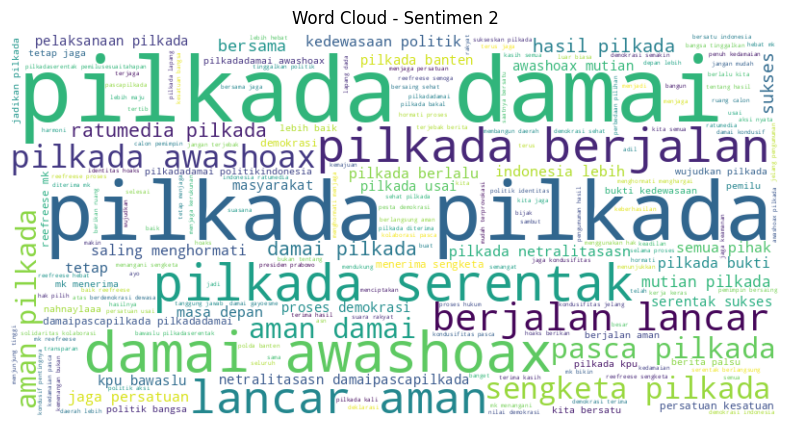

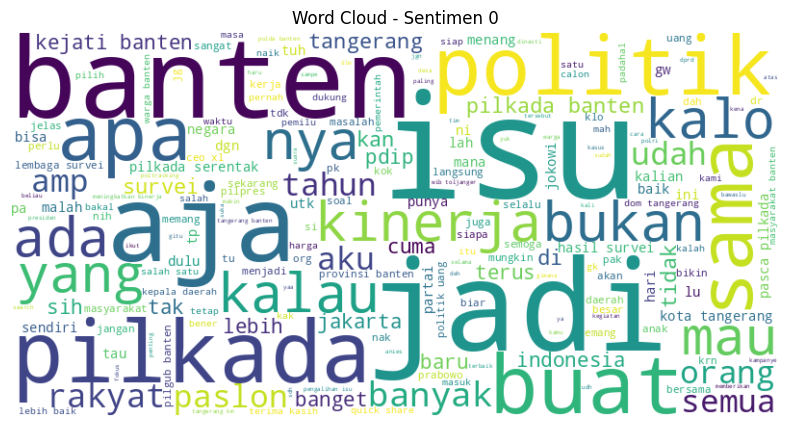

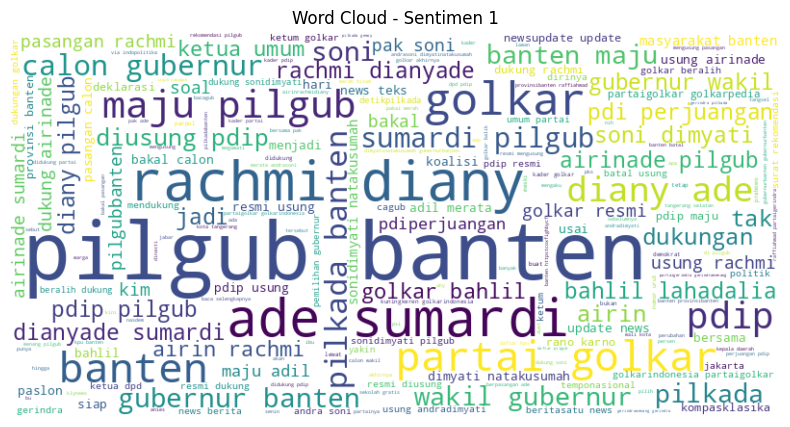

<ipython-input-26-7b0fe3c33215>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=sentiment_column, palette="viridis")


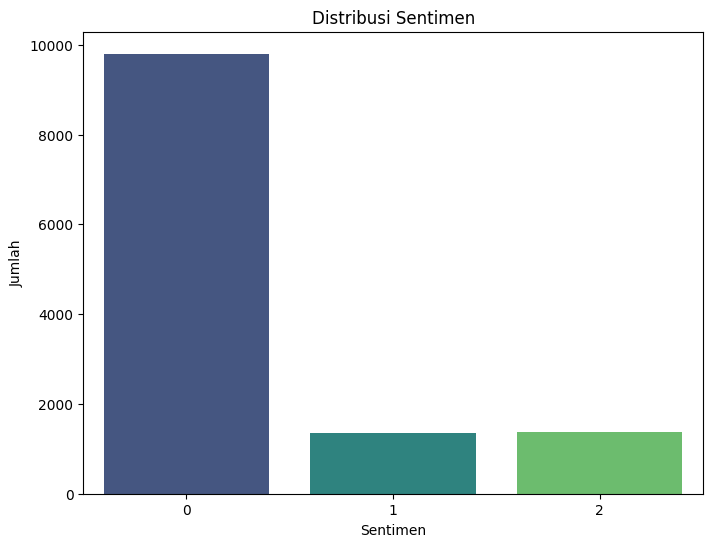

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 1. Baca dataset
file_path = "/content/data_hasil_stemming.csv"  # Pastikan file berada di direktori yang sama
df = pd.read_csv(file_path)

# 2. Pastikan kolom teks dan sentimen benar
# Ganti 'text' dan 'sentiment' dengan nama kolom yang sesuai di dataset Anda
text_column = 'full_text'  # Nama kolom teks, diubah menjadi 'full_text'
sentiment_column = 'sentimen'  # Nama kolom sentimen, diubah menjadi 'sentimen'

# 3. Cek nilai unik dalam kolom sentimen
print("Nilai unik pada kolom sentimen:")
print(df[sentiment_column].unique())

# 4. Pisahkan data berdasarkan sentimen
sentiments = df[sentiment_column].unique()
sentiment_groups = {sentiment: df[df[sentiment_column] == sentiment] for sentiment in sentiments}

# 5. Buat Word Cloud untuk setiap sentimen
for sentiment, group in sentiment_groups.items():
    text = " ".join(group[text_column].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Sentimen {sentiment}")
    plt.show()

# 6. Buat grafik distribusi jumlah data per sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=sentiment_column, palette="viridis")
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()